# Projet de Machine Learning : Test de classification bout en bout 



## 1.Chargement des données 

In [1]:
#importation des modules necessaires
import pyspark
from pyspark.sql import SparkSession
import joblib

In [2]:
#creation d'une session spark 

mon_spark=SparkSession.builder.master("local").appName("MLproject").getOrCreate()

ccdefault = mon_spark.read.format("csv").options(header=True,inferSchema=True).load("Doc_Evaluation/session pratique/data/ccdefault.csv")

21/09/12 10:42:58 WARN Utils: Your hostname, HP-ProBook-450-G3 resolves to a loopback address: 127.0.1.1; using 192.168.1.126 instead (on interface wlp2s0)
21/09/12 10:42:58 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/09/12 10:43:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [3]:
# Affichage des 3 premières lignes
ccdefault.show(3)

+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|DEFAULT|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+
|  1|    20000|  2|        2|       1| 24|    2|    2|   -1|   -1|   -2|   -2|     3913|     3102|      689|        0|        0|        0|       0|     689|       0|       0|       0|       0|      1|
|  2|   120000|  2|        2|       2| 26|   -1|    2|    0|    0|    0|    2|     2682|     1725|     2682|     3272|     3455|     3261|       0|    1000|    1000|    1000|       0|    2000|    

## 2. Analyse exploratoire

In [6]:
# Affichage des attributs
ccdefault.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- LIMIT_BAL: integer (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- EDUCATION: integer (nullable = true)
 |-- MARRIAGE: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PAY_0: integer (nullable = true)
 |-- PAY_2: integer (nullable = true)
 |-- PAY_3: integer (nullable = true)
 |-- PAY_4: integer (nullable = true)
 |-- PAY_5: integer (nullable = true)
 |-- PAY_6: integer (nullable = true)
 |-- BILL_AMT1: integer (nullable = true)
 |-- BILL_AMT2: integer (nullable = true)
 |-- BILL_AMT3: integer (nullable = true)
 |-- BILL_AMT4: integer (nullable = true)
 |-- BILL_AMT5: integer (nullable = true)
 |-- BILL_AMT6: integer (nullable = true)
 |-- PAY_AMT1: integer (nullable = true)
 |-- PAY_AMT2: integer (nullable = true)
 |-- PAY_AMT3: integer (nullable = true)
 |-- PAY_AMT4: integer (nullable = true)
 |-- PAY_AMT5: integer (nullable = true)
 |-- PAY_AMT6: integer (nullable = true)
 |-- DEFAULT: integer (nullable = tru

In [7]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Conversion en dataframe pandas pour une meilleure manipulation
ccdefault.pd=ccdefault.toPandas()


# Changement de nom de colonnnes, la colonne "PAY_0" devrait plutot etre "PAY_1"

ccdefault.pd.rename(columns={'PAY_0':'PAY_1'},inplace = True)
ccdefault.pd.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [8]:
## Quelques statistiques des données 
ccdefault.pd.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### 2.1 Distribution des variables continues

In [9]:
## variables quantitatives 
var_quant=ccdefault.pd[['LIMIT_BAL','AGE','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]

var_quant

,LIMIT_BAL,AGE,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,0,0,0,0,689,0,0,0,0
1,120000,26,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,43,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,37,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,41,52774,11855,48944,85900,3409,1178,1926,52964,1804


/home/tabsoba/ML/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/tabsoba/ML/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/tabsoba/ML/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

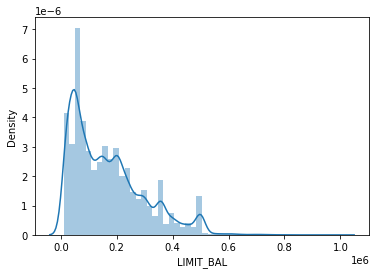

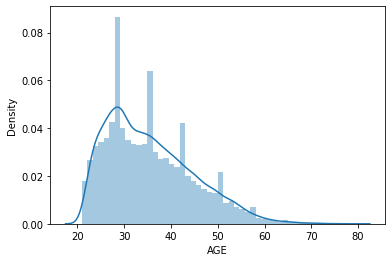

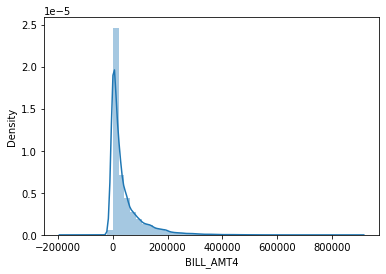

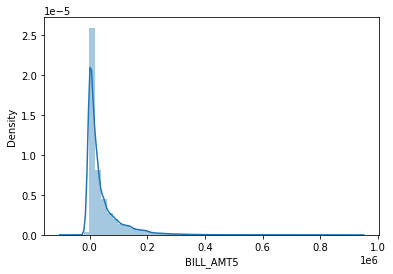

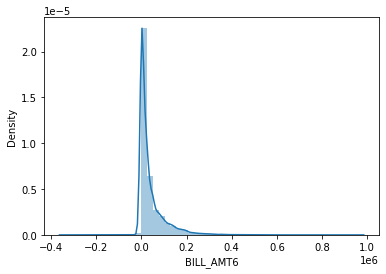

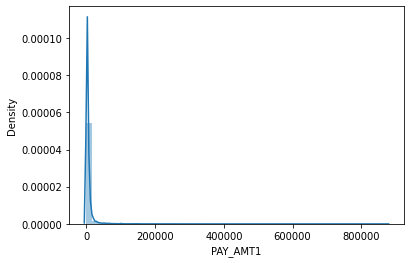

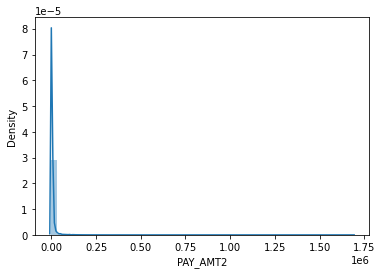

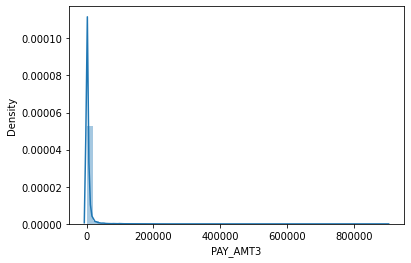

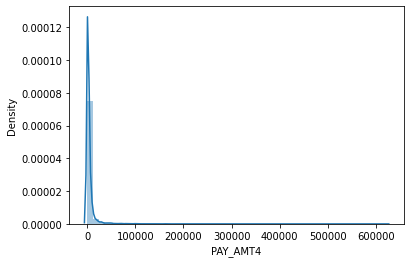

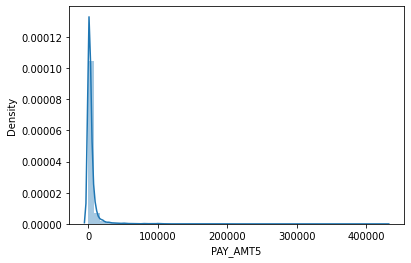

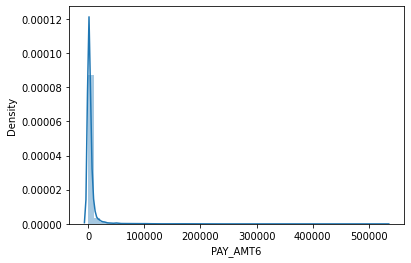

In [10]:
for col in var_quant:
    plt.figure()
    sns.distplot(var_quant[col])

### 2.2 Distribution des variables qualitatives

In [11]:
## variables qualitatives
var_qual=ccdefault.pd[['SEX','MARRIAGE','EDUCATION','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]

var_qual

,SEX,MARRIAGE,EDUCATION,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,1,2,2,2,-1,-1,-2,-2
1,2,2,2,-1,2,0,0,0,2
2,2,2,2,0,0,0,0,0,0
3,2,1,2,0,0,0,0,0,0
4,1,1,2,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...
29995,1,1,3,0,0,0,0,0,0
29996,1,2,3,-1,-1,-1,-1,0,0
29997,1,2,2,4,3,2,-1,0,0
29998,1,1,3,1,-1,0,0,0,-1


In [12]:
## Presentation des differentes catégories pour chaque variable qualitative
for col in var_qual:
    print(f'{col:-<50} {var_qual[col].unique()}')

SEX----------------------------------------------- [2 1]
MARRIAGE------------------------------------------ [1 2 3 0]
EDUCATION----------------------------------------- [2 1 3 5 4 6 0]
PAY_1--------------------------------------------- [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2--------------------------------------------- [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3--------------------------------------------- [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4--------------------------------------------- [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5--------------------------------------------- [-2  0 -1  2  3  5  4  7  8  6]
PAY_6--------------------------------------------- [-2  2  0 -1  3  6  4  7  8  5]


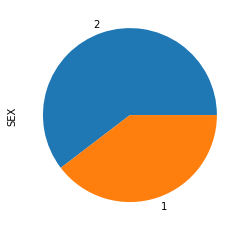

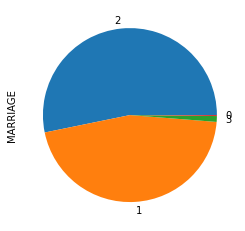

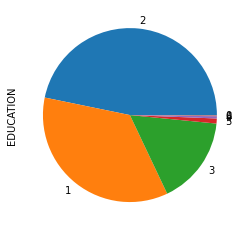

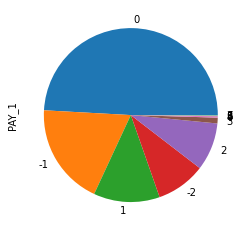

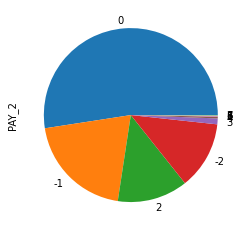

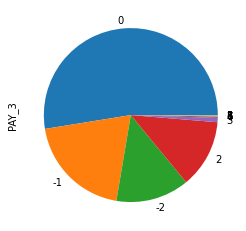

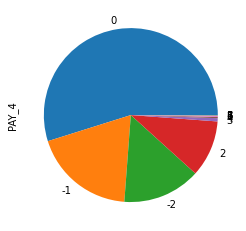

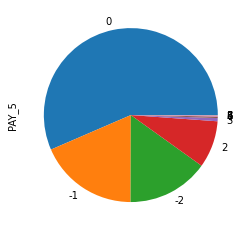

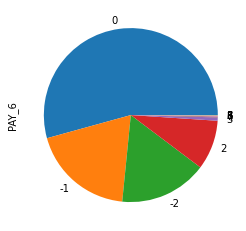

In [13]:
## Presentation des differentes catégories dans chaque variable
for col in var_qual:
    plt.figure()
    var_qual[col].value_counts().plot.pie()
    

### 2.3 Relation entre variables explicatives et variable cible

In [14]:
# Changement du code de 'SEX' (1,2) en 'F' and 'M' 

ccdefault.pd["SEX"]=ccdefault.pd["SEX"].map({1:'M',2:'F'}).astype('category')
ccdefault.pd["SEX"].dtypes

# Creation d'une nouvelle colonne nommée "RET_PAY" indiquant les clients ayant au moins un retard de payement de PAY_1 to Pay_6
# 0 : PAS_RETARD ; 1: RETARD

condition = (ccdefault.pd.PAY_1 >1) | (ccdefault.pd.PAY_2 >1) | (ccdefault.pd.PAY_3 >1) | (ccdefault.pd.PAY_4 >1) | (ccdefault.pd.PAY_5 >1) | (ccdefault.pd.PAY_6 >1)
ccdefault.pd.loc[condition, "RET_PAY"] = 1
ccdefault.pd.loc[ccdefault.pd.RET_PAY.isna(),"RET_PAY"] = 0

ccdefault.pd

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,RET_PAY
0,1,20000,F,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,1.0
1,2,120000,F,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1.0
2,3,90000,F,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0.0
3,4,50000,F,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0.0
4,5,50000,M,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,M,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,0.0
29996,29997,150000,M,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,0.0
29997,29998,30000,M,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,1.0
29998,29999,80000,M,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,0.0


In [15]:
# fonction pour representer les relations entre les attributs et la variable cible 

def relation_var(nom_colonne):

    # Get the percentage of default by each group
    status_rembourse_group = pd.crosstab(index=ccdefault.pd['RET_PAY'],columns = ccdefault.pd[nom_colonne], normalize = 'columns')
    
    # Round up to 2 decimal
    status_rembourse_group = status_rembourse_group.apply(lambda x: round(x,2))
    
    labels =  status_rembourse_group.columns
    list1 =  status_rembourse_group.iloc[0].to_list()
    list2 =  status_rembourse_group.iloc[1].to_list()
    
    list1_name = "Remboursé"
    list2_name = "Non Remboursé"
    title = f"Default by {nom_colonne}"
    xlabel = nom_colonne
    ylabel = "Pourcentage de non remboursement"
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")
    
    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()


#### Relation entre la variable cible et le sexe, le status matrimonial et le niveau d'education des clients

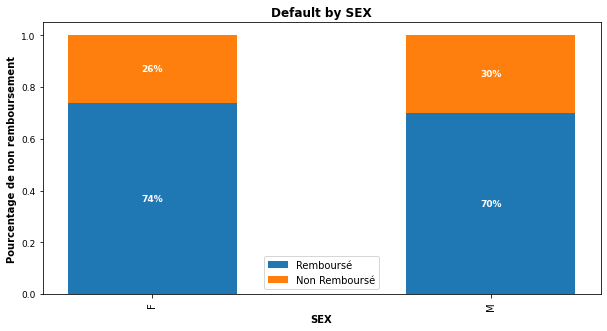

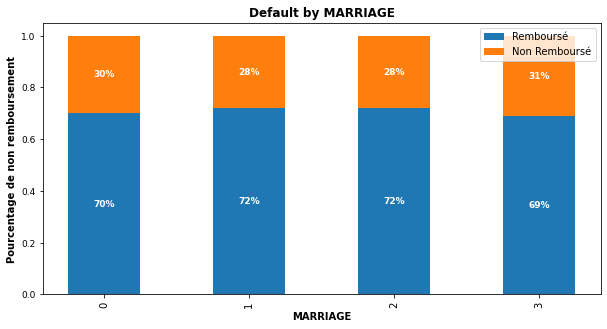

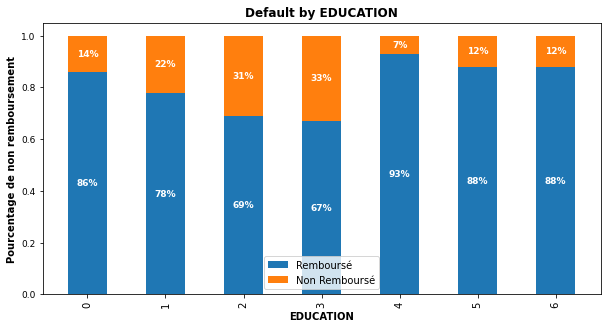

In [16]:
var_qual1=["SEX","MARRIAGE","EDUCATION"]

for col in var_qual1:
    relation_var(col)

#### Relation variable cible et age des clients

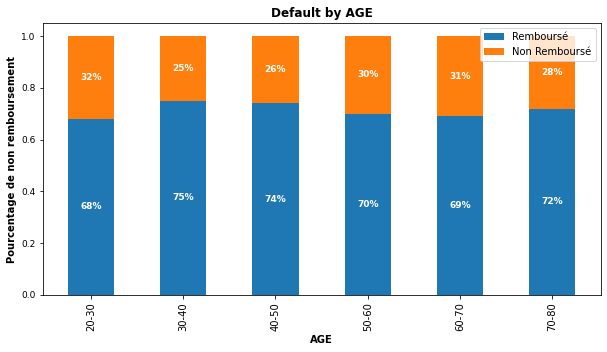

In [17]:


bornes= [21,30,40,50,60,70,80]
tranches_ages = ['20-30','30-40','40-50','50-60','60-70','70-80']
ccdefault.pd['AGE'] = pd.cut(ccdefault.pd['AGE'],bins=bornes, labels=tranches_ages ,right=False)

relation_var('AGE')

### 2.4 Tendance des paiements entre avril 2005 et septembre 2005

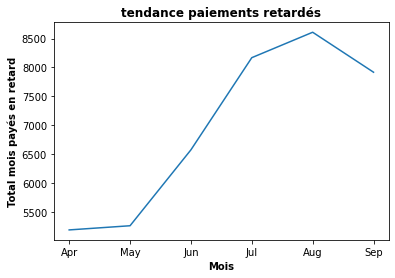

In [18]:
# Extraction des clients ayant au moins un retard de payement entre avril et septembre

retard= ccdefault.pd[ccdefault.pd['RET_PAY']== 1]
tendance= retard[['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1']].sum(axis=0)

fig,ax = plt.subplots()
ax.plot(tendance)
plt.xticks(['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1'],['Apr','May','Jun','Jul','Aug','Sep'])

plt.xlabel('Mois',fontweight='bold')
plt.ylabel('Total mois payés en retard',fontweight='bold')
plt.title('tendance paiements retardés',fontweight='bold')

plt.show()

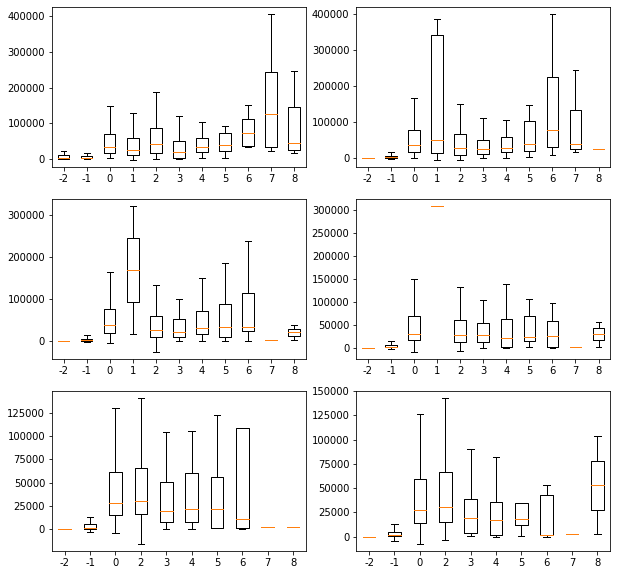

In [19]:
# Correlation entre la consommation et le temps de retard mis pour le paiement

from matplotlib.pyplot import figure

retard= ccdefault.pd[ccdefault.pd['RET_PAY']== 1]
paiements = [ f"PAY_{i}" for i in range(1, 7) ]
consommation= [ f"BILL_AMT{i}" for i in range(1, 7) ]

fig, ax = plt.subplots(3,2, figsize=(10, 10))

for paie, conso, m in zip(paiements, consommation, ax.flatten()):
    
   
    data = []
    for i in sorted(retard[paie].unique()):
        temp = retard.loc[retard[paie] == i, conso]
        data.append(temp)
    m.boxplot(data, showfliers=False,) 
    m.set_xticklabels(sorted(retard[paie].unique()))
    
plt.show()

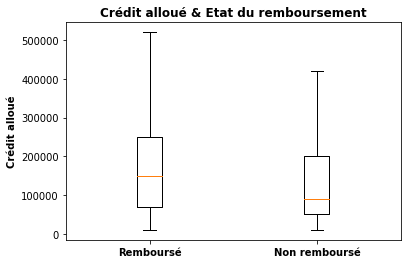

In [20]:
# Correlation entre le crédit alloué et la variable cible
# 1: non remboursé ; 0: remboursé

def0 = ccdefault.pd.loc[ccdefault.pd['DEFAULT'] == 0,'LIMIT_BAL']
def1 = ccdefault.pd.loc[ccdefault.pd['DEFAULT'] == 1,'LIMIT_BAL']

fig, ax = plt.subplots()
ax.boxplot([def0, def1],  showfliers=False)

ax.set_xticklabels(['Remboursé',"Non remboursé"],fontweight ='bold')
ax.set_ylabel('Crédit alloué',fontweight ='bold')
ax.set_title('Crédit alloué & Etat du remboursement',fontweight ='bold')

plt.show()

## 3. Etude comparative de modèles de machine learning pour la prediction de la variable cible

In [56]:


## Valeurs manquantes 

for c in ccdefaultNew.columns:
    count=ccdefaultNew.filter(c+" is   NULL" or c+"is ''" or c+"is  NaN" or c+"is  null").count()
    print(str(count) +" valeurs manquantes dans la colonne "+ c)

0 valeurs manquantes dans la colonne ID
0 valeurs manquantes dans la colonne LIMIT_BAL
0 valeurs manquantes dans la colonne SEX
0 valeurs manquantes dans la colonne EDUCATION
0 valeurs manquantes dans la colonne MARRIAGE
0 valeurs manquantes dans la colonne AGE
0 valeurs manquantes dans la colonne PAY_0
0 valeurs manquantes dans la colonne PAY_2
0 valeurs manquantes dans la colonne PAY_3
0 valeurs manquantes dans la colonne PAY_4
0 valeurs manquantes dans la colonne PAY_5
0 valeurs manquantes dans la colonne PAY_6
0 valeurs manquantes dans la colonne BILL_AMT1
0 valeurs manquantes dans la colonne BILL_AMT2
0 valeurs manquantes dans la colonne BILL_AMT3
0 valeurs manquantes dans la colonne BILL_AMT4
0 valeurs manquantes dans la colonne BILL_AMT5
0 valeurs manquantes dans la colonne BILL_AMT6
0 valeurs manquantes dans la colonne PAY_AMT1
0 valeurs manquantes dans la colonne PAY_AMT2
0 valeurs manquantes dans la colonne PAY_AMT3
0 valeurs manquantes dans la colonne PAY_AMT4
0 valeurs manq

In [171]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, VectorIndexer, MinMaxScaler
from pyspark.ml import Pipeline
from pyspark.sql.functions import *

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier

from pyspark.ml.evaluation import  BinaryClassificationEvaluator

# Drop ID column
ccdefault = ccdefault .select(ccdefault .schema.names[1:])

# Split data into training and test sample
splits = ccdefault.randomSplit([0.75, 0.25])
ccdefault_train = splits[0]
ccdefault_test = splits[1]

# Get and convert categorical features (SEX, EDUCATION, MARRIAGE)
categorical_features = ccdefault.schema.names[1:4]
catVect = VectorAssembler(inputCols = categorical_features, outputCol = "catFeatures")
catIdx = VectorIndexer(inputCol = catVect.getOutputCol(), outputCol = "idxCatFeatures")


# Get and normalize numerical features
numerical_features = ccdefault.schema.names[0:1] + ccdefault.schema.names[4:]
numVect = VectorAssembler(inputCols = numerical_features, outputCol = "numFeatures")
minMax = MinMaxScaler(inputCol = numVect.getOutputCol(), outputCol = "normFeatures")


# Define pipeline 
featVect = VectorAssembler(inputCols=["idxCatFeatures", "normFeatures"], outputCol = "features")
pipeline = Pipeline(stages = [catVect, catIdx, numVect, minMax, featVect])
pipeline_object = pipeline.fit(ccdefault_train)

# Run training and test data through the pipeline
ccdefault_train = pipeline_object.transform(ccdefault_train).select("features", col("DEFAULT").alias("label"))
ccdefault_test = pipeline_object.transform(ccdefault_test).select("features", col("DEFAULT").alias("label"))






In [150]:


accuracy = MulticlassClassificationEvaluator(
    labelCol = "label", predictionCol = "prediction", metricName = "accuracy")
precision = MulticlassClassificationEvaluator(
    labelCol = "label", predictionCol = "prediction", metricName = "weightedPrecision")
recall = MulticlassClassificationEvaluator(
    labelCol = "label", predictionCol = "prediction", metricName = "weightedRecall")



### 3.1 Regression logistique

In [173]:
logit = LogisticRegression(labelCol = "label", featuresCol = "features", maxIter = 20, regParam = 0.2)
model = logit.fit(ccdefault_train)
predictions = model.transform(ccdefault_test)

predictions.select("prediction", "label", "features").show(5)

# select (prediction, true label) and compute test error
evaluator = BinaryClassificationEvaluator() # MulticlassClassificationEvaluator().setLabelCol("label").setPredictionCol("prediction").setMetricName("rmse")
auc = evaluator.evaluate(predictions)
print("AUC = "+ str(auc))


+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|    0|[1.0,-3768.0,-393...|
|       0.0|    0|[1.0,-2640.0,0.0,...|
|       1.0|    1|(15,[0,1,2,4,5,6,...|
|       0.0|    0|[1.0,-2000.0,780....|
|       0.0|    0|(15,[0,1,2,4,5,6,...|
+----------+-----+--------------------+
only showing top 5 rows

AUC = 0.9999992147530933


### 3.2 Arbre de decision

In [170]:
dt = DecisionTreeClassifier().setLabelCol("label").setFeaturesCol("features")

# train the model
dtModel = dt.fit(ccdefault_train)

# make predictions on the test data
predictions = dtModel.transform(ccdefault_test)
predictions.select("prediction", "label", "features").show(5)

# select (prediction, true label) and compute test error
evaluator = BinaryClassificationEvaluator() # MulticlassClassificationEvaluator().setLabelCol("label").setPredictionCol("prediction").setMetricName("rmse")
auc = evaluator.evaluate(predictions)
print("AUC = "+ str(auc))

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       1.0|    1|[1.0,1.0,-6029.0,...|
|       0.0|    0|[1.0,1.0,-6028.0,...|
|       0.0|    0|[1.0,1.0,-3768.0,...|
|       0.0|    0|[1.0,1.0,-2640.0,...|
|       0.0|    0|(16,[0,1,2,4,5,6,...|
+----------+-----+--------------------+
only showing top 5 rows

AUC = 1.0


### 3.3 Forêt aleatoire 

In [168]:
# TODO: Replace <FILL IN> with appropriate code

rf =   RandomForestClassifier().setLabelCol("label").setFeaturesCol("features")

# train the model
rfModel = rf.fit(ccdefault_train)

# make predictions on the test data
predictions = rfModel.transform(ccdefault_test)
predictions.select("prediction", "label", "features").show(5)

# select (prediction, true label) and compute test error
evaluator = BinaryClassificationEvaluator() # MulticlassClassificationEvaluator().setLabelCol("label").setPredictionCol("prediction").setMetricName("rmse")
auc = evaluator.evaluate(predictions)
print("AUC = "+ str(auc))

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       1.0|    1|[1.0,1.0,-6029.0,...|
|       0.0|    0|[1.0,1.0,-6028.0,...|
|       0.0|    0|[1.0,1.0,-3768.0,...|
|       0.0|    0|[1.0,1.0,-2640.0,...|
|       0.0|    0|(16,[0,1,2,4,5,6,...|
+----------+-----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 1.0
